# Jazz Trio Descriptive Stats and Data Cleaning

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import shutil
import json

### Determine the number of trios before data preprocessing

In [ ]:
# Folder where metadata files are stored
metadata_folder = r'C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\raw_data\metadata'

unique_band_names = set()

# Loops through metadata files
for filename in os.listdir(metadata_folder):
    if filename.endswith('_metadata.json'):
        try:
            # Extract band name from filename: track_band_metadata.json
            parts = filename.split('_')
            if len(parts) >= 3:
                band_name = parts[1]
                unique_band_names.add(band_name)
        except Exception as e:
            print(f"Error parsing {filename}: {e}")

# Output result
print(f"Number of unique band names: {len(unique_band_names)}")


Number of unique band names: 101


### Assess file length and remove outliers

53
2050


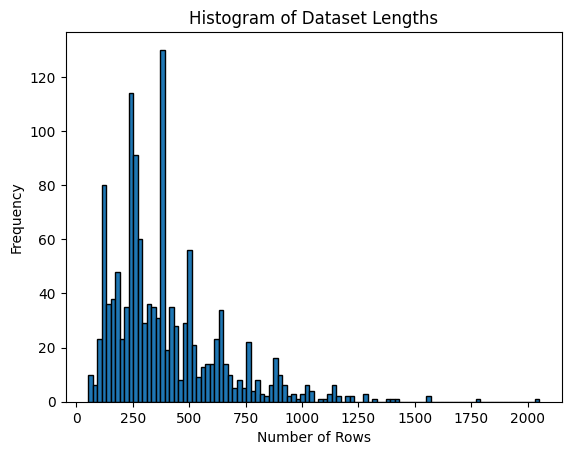

In [ ]:
# Define the root directory
root_dir = r"C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\original_data"

# List to store dataset lengths 
dataset_lengths = []

# Loops through each folder in the directory
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    csv_path = os.path.join(folder_path, "beats.csv")
    
    # Check if it's a directory and contains the beat.csv file
    if os.path.isdir(folder_path) and os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        
        # Check if the required columns exist
        required_columns = {"piano", "bass", "drums"}
        if required_columns.issubset(df.columns):
            dataset_lengths.append(len(df))
        else:
            print(f"Skipping {csv_path}: Missing required columns")
    else:
        print(f"Skipping {csv_path}: File not found")

# Visualize the full distribution of file lengths
print(min(dataset_lengths))
print(max(dataset_lengths))
# Plot histogram
plt.hist(dataset_lengths, bins=100, edgecolor='black')
plt.xlabel("Number of Rows")
plt.ylabel("Frequency")
plt.title("Histogram of Dataset Lengths")
plt.show()

140.3
727.7
Included datasets: 1034 out of 1294 (79.91%)
Included datasets: 1034 out of 1294 (79.91%)


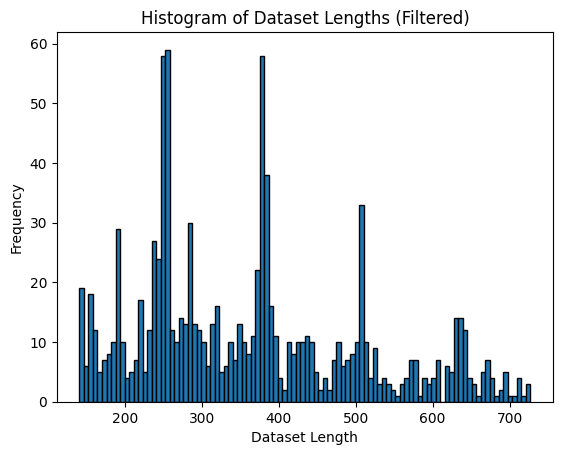

In [ ]:
# Sets the percentile bounds for allowed file length
min_length = np.percentile(dataset_lengths, 10)  # Lower bound
max_length = np.percentile(dataset_lengths, 90) # Upper bound
print(min_length)
print(max_length)

# Count how many datasets fall within this range
included_count = sum((min_length <= length <= max_length) for length in dataset_lengths)

total_count = len(dataset_lengths)
print(f"Included datasets: {included_count} out of {total_count} ({(included_count/total_count)*100:.2f}%)")

# Filter values within the specified bounds
filtered_lengths = [length for length in dataset_lengths if min_length <= length <= max_length]

# Count how many datasets fall within this range
included_count = len(filtered_lengths)
total_count = len(dataset_lengths)

print(f"Included datasets: {included_count} out of {total_count} ({(included_count/total_count)*100:.2f}%)")

# Visualize the data after filtering by file length
plt.hist(filtered_lengths, bins=100, edgecolor='black')
plt.title("Histogram of Dataset Lengths (Filtered)")
plt.xlabel("Dataset Length")
plt.ylabel("Frequency")
plt.show()

# Delete files outside bounds
removed_files = 0
for path, length in zip(file_paths, dataset_lengths):
    if length < min_length or length > max_length:
        os.remove(path)
        removed_files += 1

### Rename and move beat and metadata files

In [ ]:
# Define the paths to the folders
source_folder = r'C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\original_data'  # Replace with the actual folder path
beats_folder = r'C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\raw_data\beats'  # Folder to store the extracted beats
metadata_folder = r'C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\raw_data\metadata'  # Folder to store the metadata

# Function to extract the desired name from a folder
def get_new_name(filename):
    parts = filename.split('-')
    track_name = parts[1]
    band_name = parts[2]
    return f"{track_name}_{band_name}"

# Searches through files in the source folder
for root, dirs, files in os.walk(source_folder):
    for file in files:
        # Check if the file is a beat file (beats.csv)
        if file == 'beats.csv':
            # Get the full path of the beat file
            beat_file_path = os.path.join(root, file)
            
            # Get the length of the file 
            df = pd.read_csv(beat_file_path)
            file_length = len(df)

            
            if min_length <= file_length <= max_length:
                # Get the new name based on the folder structure
                new_name = get_new_name(root)
                
                # Move the beat file to the new folder with the new name
                new_beat_file_path = os.path.join(beats_folder, f"{new_name}_beats.csv")
                shutil.copy(beat_file_path, new_beat_file_path)
                
                # Now handle the metadata file, assuming it ends with .json
                metadata_file = 'metadata.json'  # Assuming metadata file is named 'metadata.json'
                metadata_file_path = os.path.join(root, metadata_file)
                
                if os.path.exists(metadata_file_path):
                    # Move the metadata file to the new folder with the new name
                    new_metadata_file_path = os.path.join(metadata_folder, f"{new_name}_metadata.json")
                    shutil.copy(metadata_file_path, new_metadata_file_path)

                print(f"Processed: {new_name}")


Processed: beautifullove_mrazgrileyb
Processed: bebop_hadenchaynesr
Processed: bemshaswing_reidrwaitsf
Processed: bemshaswing_reidrwaitsf
Processed: catchandrelease_kitagawakbladeb
Processed: embraceableyou_reidrwaitsf
Processed: embraceableyoutake2_reidrwaitsf
Processed: equinox_kitagawakbladeb
Processed: forheavenssake_mrazgrileyb
Processed: greenchimneys_williamsbrileyb
Processed: howdeepistheocean_mrazgrileyb
Processed: howdeepistheocean_reidrlewisv
Processed: hushabye_mrazgrileyb
Processed: imconfessin_reidrlewisv
Processed: imeanyou_carterrcobhamb
Processed: iveneverbeeninlove_mrazgrileyb
Processed: lemuria_reidrwaitsf
Processed: lunacy_kitagawakblakej
Processed: minorblues_mrazgrileyb
Processed: myonesininlife_reidrwaitsf
Processed: outofnowhere_carterrcobhamb
Processed: prayer_kitagawakblakej
Processed: shuffleboil_kitagawakblakej
Processed: somedaymyprincewillcome_williamsbrileyb
Processed: stellabystarlight_carterrcobhamb
Processed: surreywiththefringeon_drummondrrileyb
Proce

## Clean Data with Different Combos

#### Cleaning Piano + Bass

In [ ]:
# Define folder path
folder_path = r'C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\raw_data\beats' 

# Define the columns to extract (adjust as needed)
col1 = "piano"  # Replace with actual column name
col2 = "bass"  # Replace with actual column name

# Loop through each CSV file in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        
        # Ensure columns exist
        if col1 in df.columns and col2 in df.columns:
            selected_data = df[[col1, col2]]
            
            # Remove first value from each column
            processed_data = selected_data.iloc[1:].reset_index(drop=True)
            
            # Compute ITI and IRI columns
            diff_col1 = selected_data[col1].diff().iloc[1:].reset_index(drop=True)
            diff_col2 = selected_data[col2].diff().iloc[1:].reset_index(drop=True)
            
            # Compute asynchrony column
            middle_diff = processed_data[col1] - processed_data[col2]
            
            # Reorder columns
            processed_data[f"Tone Time"] = processed_data[[col1]]
            processed_data[f"ITI"] = diff_col1
            processed_data["Asynchornies"] = middle_diff
            processed_data[f"Response Time"] = selected_data[col2].iloc[1:].reset_index(drop=True)
            processed_data[f"IRI"] = diff_col2
            
            # Drop first two columns
            processed_data = processed_data.iloc[:, 2:].reset_index(drop=True)
            
            # Rename file
            base_name = "_".join(file.split("_")[:-1])  # Remove last part
            new_file_name = f"112_{base_name}.csv"
            output_path = os.path.join("C:/Users/marc1/OneDrive/Desktop/School/Aarhus University/Current Classes/Thesis/Data/processed_data/unfiltered_processed_data", new_file_name)  # Adjust output folder as needed
            
            # Save the modified DataFrame
            processed_data.to_csv(output_path, index=False)
            print(f"Processed and saved: {new_file_name}")
        else:
            print(f"Skipping {file}: Required columns not found.")


Processed and saved: 112_117thstreetalternate_mckibbonaroachm.csv
Processed and saved: 112_117thstreet_mckibbonaroachm.csv
Processed and saved: 112_2300skidooalternate_mckibbonablakeya.csv
Processed and saved: 112_2300skidoo_mckibbonablakeya.csv
Processed and saved: 112_34skidoo_gomezemorellm.csv
Processed and saved: 112_34skidoo_gomezezigmunde.csv
Processed and saved: 112_34skidoo_johnsonmlabarberaj.csv
Processed and saved: 112_45degreeangle_duviviergrichmondd.csv
Processed and saved: 112_5021_mrazgjonese.csv
Processed and saved: 112_52ndstreettheme_cranshawbcopelandk.csv
Processed and saved: 112_aarp_andersonjhirshfieldj.csv
Processed and saved: 112_afroblue_mrazgfostera.csv
Processed and saved: 112_aintthinkinboutit_jonesslucasr.csv
Processed and saved: 112_airoloblue_gertzejntshokom.csv
Processed and saved: 112_alansallies_duviviergdawsona.csv
Processed and saved: 112_aliceinwonderland_gomezemotianp.csv
Processed and saved: 112_alittlebarefootsoul_jonesslucasr.csv
Processed and sav

#### Cleaning Piano + Drums

In [ ]:
# Define folder path
folder_path = r'C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\raw_data\beats' 

# Define the columns to extract (adjust as needed)
col1 = "piano"  # Replace with actual column name
col2 = "drums"  # Replace with actual column name

# Loop through each CSV file in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        
        # Ensure columns exist
        if col1 in df.columns and col2 in df.columns:
            selected_data = df[[col1, col2]]
            
            # Remove first value from each column
            processed_data = selected_data.iloc[1:].reset_index(drop=True)
            
            # Compute ITI and IRI columns
            diff_col1 = selected_data[col1].diff().iloc[1:].reset_index(drop=True)
            diff_col2 = selected_data[col2].diff().iloc[1:].reset_index(drop=True)
            
            # Compute asynchrony column
            middle_diff = processed_data[col1] - processed_data[col2]
            
            # Reorder columns
            processed_data[f"Tone Time"] = processed_data[[col1]]
            processed_data[f"ITI"] = diff_col1
            processed_data["Asynchornies"] = middle_diff
            processed_data[f"Response Time"] = selected_data[col2].iloc[1:].reset_index(drop=True)
            processed_data[f"IRI"] = diff_col2
            
            # Drop first two columns
            processed_data = processed_data.iloc[:, 2:].reset_index(drop=True)
            
            # Rename file
            base_name = "_".join(file.split("_")[:-1])  # Remove last part
            new_file_name = f"113_{base_name}.csv"
            output_path = os.path.join("C:/Users/marc1/OneDrive/Desktop/School/Aarhus University/Current Classes/Thesis/Data/processed_data/unfiltered_processed_data", new_file_name)  # Adjust output folder as needed
            
            # Save the modified DataFrame
            processed_data.to_csv(output_path, index=False)
            print(f"Processed and saved: {new_file_name}")
        else:
            print(f"Skipping {file}: Required columns not found.")


Processed and saved: 113_117thstreetalternate_mckibbonaroachm.csv
Processed and saved: 113_117thstreet_mckibbonaroachm.csv
Processed and saved: 113_2300skidooalternate_mckibbonablakeya.csv
Processed and saved: 113_2300skidoo_mckibbonablakeya.csv
Processed and saved: 113_34skidoo_gomezemorellm.csv
Processed and saved: 113_34skidoo_gomezezigmunde.csv
Processed and saved: 113_34skidoo_johnsonmlabarberaj.csv
Processed and saved: 113_45degreeangle_duviviergrichmondd.csv
Processed and saved: 113_5021_mrazgjonese.csv
Processed and saved: 113_52ndstreettheme_cranshawbcopelandk.csv
Processed and saved: 113_aarp_andersonjhirshfieldj.csv
Processed and saved: 113_afroblue_mrazgfostera.csv
Processed and saved: 113_aintthinkinboutit_jonesslucasr.csv
Processed and saved: 113_airoloblue_gertzejntshokom.csv
Processed and saved: 113_alansallies_duviviergdawsona.csv
Processed and saved: 113_aliceinwonderland_gomezemotianp.csv
Processed and saved: 113_alittlebarefootsoul_jonesslucasr.csv
Processed and sav

#### Cleaning Bass + Drums

In [ ]:
# Define folder path
folder_path = r'C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\raw_data\beats' 

# Define the columns to extract (adjust as needed)
col1 = "bass"  # Replace with actual column name
col2 = "drums"  # Replace with actual column name

# Loop through each CSV file in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path)
        
        # Ensure columns exist
        if col1 in df.columns and col2 in df.columns:
            selected_data = df[[col1, col2]]
            
            # Remove first value from each column
            processed_data = selected_data.iloc[1:].reset_index(drop=True)
            
            # Compute ITI and IRI columns
            diff_col1 = selected_data[col1].diff().iloc[1:].reset_index(drop=True)
            diff_col2 = selected_data[col2].diff().iloc[1:].reset_index(drop=True)
            
            # Compute asynchrony column
            middle_diff = processed_data[col1] - processed_data[col2]
            
            # Reorder columns
            processed_data[f"Tone Time"] = processed_data[[col1]]
            processed_data[f"ITI"] = diff_col1
            processed_data["Asynchornies"] = middle_diff
            processed_data[f"Response Time"] = selected_data[col2].iloc[1:].reset_index(drop=True)
            processed_data[f"IRI"] = diff_col2
            
            # Drop first two columns
            processed_data = processed_data.iloc[:, 2:].reset_index(drop=True)
            
            # Rename file
            base_name = "_".join(file.split("_")[:-1])  # Remove last part
            new_file_name = f"123_{base_name}.csv"
            output_path = os.path.join("C:/Users/marc1/OneDrive/Desktop/School/Aarhus University/Current Classes/Thesis/Data/processed_data/unfiltered_processed_data", new_file_name)  # Adjust output folder as needed
            
            # Save the modified DataFrame
            processed_data.to_csv(output_path, index=False)
            print(f"Processed and saved: {new_file_name}")
        else:
            print(f"Skipping {file}: Required columns not found.")


Processed and saved: 123_117thstreetalternate_mckibbonaroachm.csv
Processed and saved: 123_117thstreet_mckibbonaroachm.csv
Processed and saved: 123_2300skidooalternate_mckibbonablakeya.csv
Processed and saved: 123_2300skidoo_mckibbonablakeya.csv
Processed and saved: 123_34skidoo_gomezemorellm.csv
Processed and saved: 123_34skidoo_gomezezigmunde.csv
Processed and saved: 123_34skidoo_johnsonmlabarberaj.csv
Processed and saved: 123_45degreeangle_duviviergrichmondd.csv
Processed and saved: 123_5021_mrazgjonese.csv
Processed and saved: 123_52ndstreettheme_cranshawbcopelandk.csv
Processed and saved: 123_aarp_andersonjhirshfieldj.csv
Processed and saved: 123_afroblue_mrazgfostera.csv
Processed and saved: 123_aintthinkinboutit_jonesslucasr.csv
Processed and saved: 123_airoloblue_gertzejntshokom.csv
Processed and saved: 123_alansallies_duviviergdawsona.csv
Processed and saved: 123_aliceinwonderland_gomezemotianp.csv
Processed and saved: 123_alittlebarefootsoul_jonesslucasr.csv
Processed and sav

## Display NaNs in data

Minimum NaN count: 0
Maximum NaN count: 2115


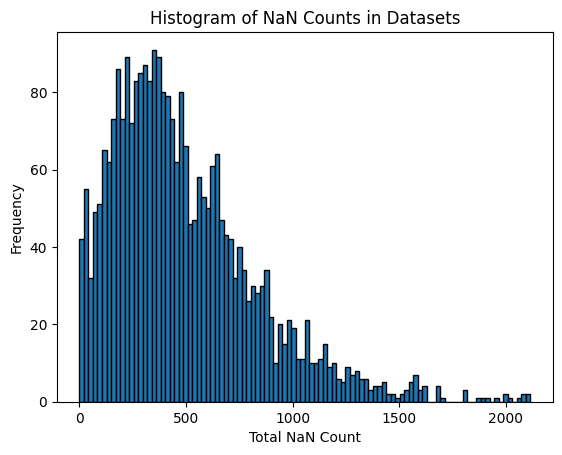

In [20]:
# Define the root directory
root_dir = r"C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\\processed_data\unfiltered_processed_data"

# List to store NaN counts
nan_counts = []

# Loop through each CSV file in the folder
for file in os.listdir(root_dir):
    if file.endswith(".csv"):  # Process only CSV files
        csv_path = os.path.join(root_dir, file)
        
        df = pd.read_csv(csv_path)
        
        # Count total NaN values in the entire DataFrame
        total_nans = df.isna().sum().sum()
        nan_counts.append(total_nans)

# Display statistics
if nan_counts:
    print("Minimum NaN count:", min(nan_counts))
    print("Maximum NaN count:", max(nan_counts))

    # Plot histogram
    plt.hist(nan_counts, bins=100, edgecolor='black')
    plt.xlabel("Total NaN Count")
    plt.ylabel("Frequency")
    plt.title("Histogram of NaN Counts in Datasets")
    plt.show()
else:
    print("No CSV files found.")

## Filtering files with Proportion of Rows with NaN >25%

Included datasets: 792 out of 2799 (28.30%)


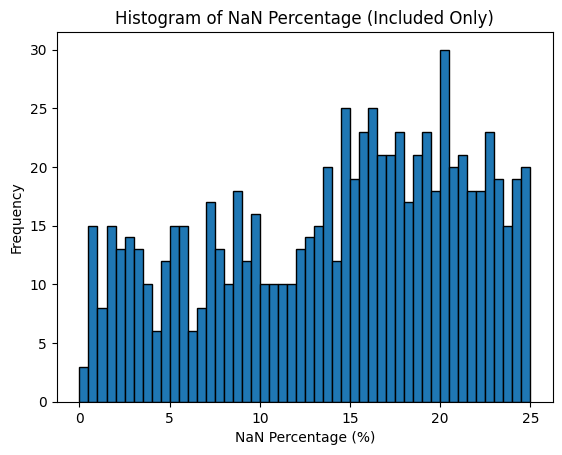

In [29]:
# Define the root directory
root_dir = r"C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\unfiltered_processed_data"

# Dictionary to store NaN proportions per unique prefix
nan_proportions = {}
file_groups = {}

# Loop through each CSV file in the folder
for file in os.listdir(root_dir):
    if file.endswith(".csv"):  # Process only CSV files
        csv_path = os.path.join(root_dir, file)
        df = pd.read_csv(csv_path)

        total_rows = len(df)
        if total_rows == 0:
            continue  # Skip empty datasets

        total_nans = df.isna().sum().sum()
        nan_ratio = total_nans / (total_rows * df.shape[1])  # Total possible cells

        # Extract prefix after the first underscore
        prefix = file.split("_", 1)[1] if "_" in file else file

        if prefix not in nan_proportions:
            nan_proportions[prefix] = []
            file_groups[prefix] = []

        nan_proportions[prefix].append(nan_ratio)
        file_groups[prefix].append(csv_path)

# Filter to prefixes where all their files have ≤10% NaNs
included_prefixes = {
    prefix for prefix, ratios in nan_proportions.items()
    if all(ratio <= .25 for ratio in ratios)
}

# Flatten filtered NaN ratios
filtered_ratios = [
    ratio
    for prefix, ratios in nan_proportions.items()
    if prefix in included_prefixes
    for ratio in ratios
]

# Summary stats
included_count = len(filtered_ratios)
total_count = sum(len(ratios) for ratios in nan_proportions.values())
print(f"Included datasets: {included_count} out of {total_count} ({(included_count/total_count)*100:.2f}%)")

# Plot
plt.hist(np.array(filtered_ratios) * 100, bins=50, edgecolor='black')  # Percent scale
plt.title("Histogram of NaN Percentage (Included Only)")
plt.xlabel("NaN Percentage (%)")
plt.ylabel("Frequency")
plt.show()

## Visualize the Length of Continuous NaN Sections

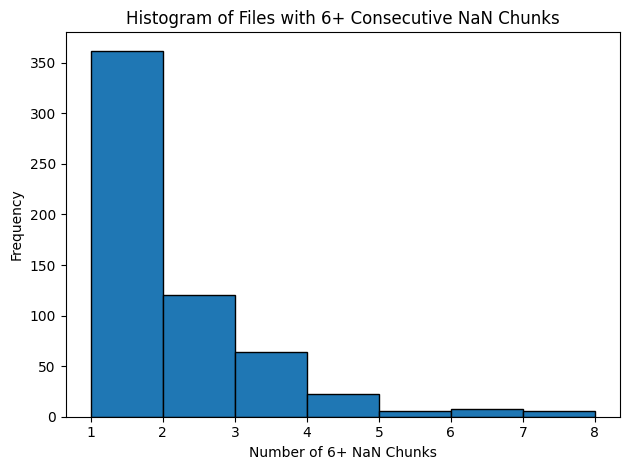

Total files analyzed: 588
Files with 6+ NaN chunks: 14


In [ ]:
# Define your root directory
root_dir = r"C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data"

# This will store counts of values between 6+ NaN chunks for each file
file_consec_nans = []

# Loop through each CSV file
for file in os.listdir(root_dir):
    if file.endswith(".csv"):
        csv_path = os.path.join(root_dir, file)
        df = pd.read_csv(csv_path)

        if df.empty or df.shape[1] < 4:
            continue  # Skip if file is empty or has fewer than 4 columns

        # Columns A, C, and D are being considered
        column_a = df.iloc[:, 0]  # Column A (1st column)
        column_c = df.iloc[:, 2]  # Column C (3rd column)
        column_d = df.iloc[:, 3]  # Column D (4th column)

        if not np.issubdtype(column_c.dtype, np.number):
            continue  # Skip if column C is not numeric

        # Check for NaN values in columns A or D
        is_nan_a_or_d = column_a.isna() | column_d.isna()  # True if either A or D has NaN

        # Now calculate the gap lengths between long NaN chunks
        i = 0
        count = 0
        consec_nans = []

        while i < len(is_nan_a_or_d):
            if is_nan_a_or_d[i] == 1:
                # Start of a NaN run
                nan_run_start = i
                while i < len(is_nan_a_or_d) and is_nan_a_or_d[i] == 1:
                    i += 1
                nan_run_len = i - nan_run_start

                if nan_run_len >= 6:
                    # Record long NaN chunk
                    consec_nans.append(nan_run_len)
                    if count > 0:
                        # Add the gap of valid data between NaN chunks
                        count = 0
                else:
                    # Short NaN chunk, count them in the gap
                    count += nan_run_len
            else:
                # Count the value in column C between the NaN chunks
                count += 1
                i += 1

        # Add the file's consecutive NaN count to the list if it meets the threshold
        if len(consec_nans) > 0:
            file_consec_nans.append(len(consec_nans))  # Number of long NaN chunks in the file

# Plot histogram of how many files have 6+ NaN chunks
plt.hist(file_consec_nans, bins=range(1, max(file_consec_nans)+1), edgecolor='black')
plt.title("Histogram of Files with 6+ Consecutive NaN Chunks")
plt.xlabel("Number of 6+ NaN Chunks")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Print some summary statistics
print(f"Total files analyzed: {len(file_consec_nans)}")
print(f"Files with 6+ NaN chunks: {sum(1 for count in file_consec_nans if count >= 6)}")


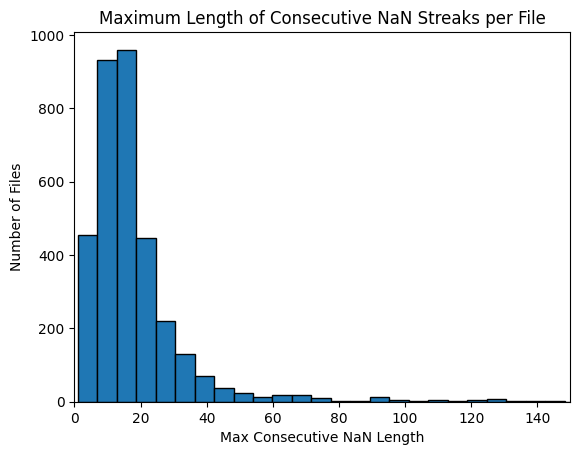

In [ ]:
# Define the root directory
root_dir = r"C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\unfiltered_processed_data"

# List to store max consecutive NaN streak lengths per file
max_consec_nan_lengths = []

# Loop through each CSV file in the folder
for file in os.listdir(root_dir):
    if file.endswith(".csv"):
        csv_path = os.path.join(root_dir, file)
        df = pd.read_csv(csv_path)

        # Flatten all NaN streaks across columns
        consec_nan_lengths = []

        for col in df.columns:
            is_nan = df[col].isna().astype(int)
            if is_nan.sum() == 0:
                continue  # No NaNs in this column, skip

            # Identify consecutive NaNs
            streak_length = 0
            for val in is_nan:
                if val == 1:
                    streak_length += 1
                elif streak_length > 0:
                    consec_nan_lengths.append(streak_length)
                    streak_length = 0
            # If the streak ends at the final row
            if streak_length > 0:
                consec_nan_lengths.append(streak_length)

        # Compute max streak length for this file
        if consec_nan_lengths:
            max_length = max(consec_nan_lengths)
            max_consec_nan_lengths.append(max_length)

# Plot the histogram
if max_consec_nan_lengths:
    plt.hist(max_consec_nan_lengths, bins=100, edgecolor='black')
    plt.title("Maximum Length of Consecutive NaN Streaks per File")
    plt.xlabel("Max Consecutive NaN Length")
    plt.ylabel("Number of Files")
        # Set the upper limit of the x-axis to 150
    plt.xlim(0, 150)
    plt.show()
else:
    print("No NaN streaks found in any file.")

## Excluding Files Based on NaN Proportion

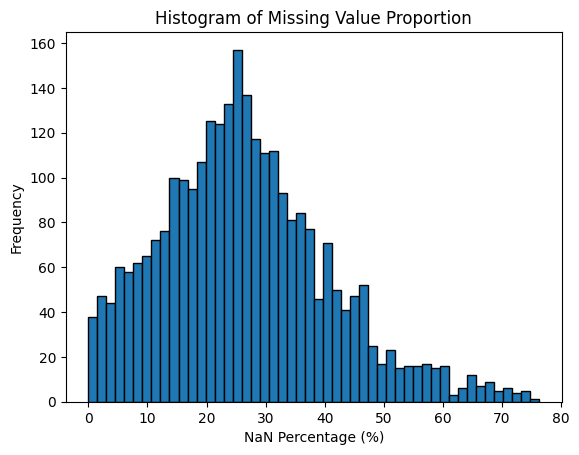

After NaN filtering: 1358 files


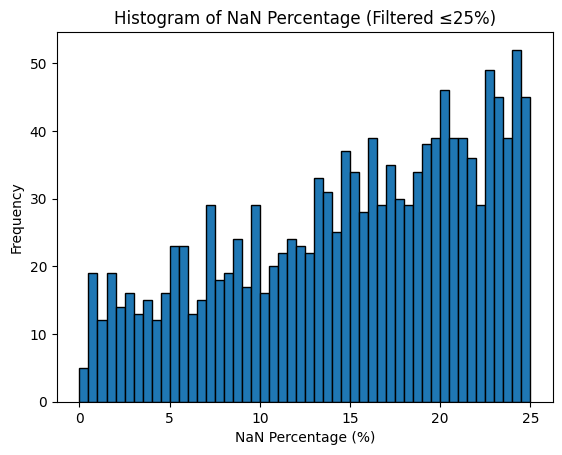

After triplet filtering: 792 files (58.32% of filtered)


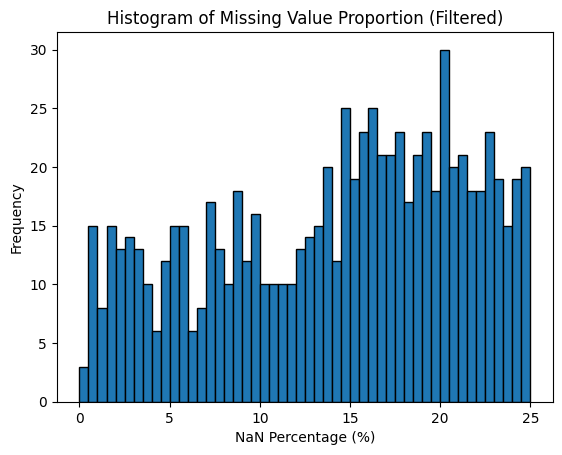

In [ ]:
# Define folders
root_dir = r"C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\unfiltered_processed_data"
new_folder = r"C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\processed_data"
metadata_root = r"C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\raw_data\metadata"
metadata_new_folder = r"C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\metadata"

# Compute NaN proportions
nan_proportions = {}
file_groups = {}

for file in os.listdir(root_dir):
    if file.endswith(".csv"):
        path = os.path.join(root_dir, file)
        df = pd.read_csv(path)
        if df.empty:
            continue
        total_cells = df.shape[0] * df.shape[1]
        nan_ratio = df.isna().sum().sum() / total_cells

        suffix = file[4:].rsplit('.', 1)[0]
        nan_proportions.setdefault(suffix, []).append(nan_ratio)
        file_groups.setdefault(suffix, []).append(path)

# Visualization of raw NaN distribution
all_ratios = [r for ratios in nan_proportions.values() for r in ratios]
plt.figure()
plt.hist(np.array(all_ratios) * 100, bins=50, edgecolor='black')
plt.title("Histogram of Missing Value Proportion")
plt.xlabel("NaN Percentage (%)")
plt.ylabel("Frequency")
plt.show()

# Filter by NaN > 25%
nan_filtered = {}
files_filtered = {}
for suffix, ratios in nan_proportions.items():
    valid = [(file_groups[suffix][i], r) for i, r in enumerate(ratios) if r <= 0.25]
    if valid:
        paths, vals = zip(*valid)
        files_filtered[suffix] = list(paths)
        nan_filtered[suffix] = list(vals)

filtered_ratios = [r for ratios in nan_filtered.values() for r in ratios]
print(f"After NaN filtering: {len(filtered_ratios)} files")
plt.figure()
plt.hist(np.array(filtered_ratios) * 100, bins=50, edgecolor='black')
plt.title("Histogram of NaN Percentage (Filtered ≤25%)")
plt.xlabel("NaN Percentage (%)")
plt.ylabel("Frequency")
plt.show()

# Ensure remaining pieces have all pairs
required = {"112", "113", "123"}
valid_suffixes = {}
for suffix, paths in files_filtered.items():
    ids = {os.path.basename(p)[:3] for p in paths}
    if required.issubset(ids):
        valid_suffixes[suffix] = paths

final_ratios = [r for s, ratios in nan_filtered.items() if s in valid_suffixes for r in ratios]
print(f"After triplet filtering: {len(final_ratios)} files ({len(final_ratios)/len(filtered_ratios)*100:.2f}% of filtered)")
plt.figure()
plt.hist(np.array(final_ratios) * 100, bins=50, edgecolor='black')
plt.title("Histogram of Missing Value Proportion (Filtered)")
plt.xlabel("NaN Percentage (%)")
plt.ylabel("Frequency")
plt.show()

# Copy valid CSVs and metadata
for suffix, paths in valid_suffixes.items():
    for p in paths:
        shutil.copy(p, new_folder)
    meta = os.path.join(metadata_root, f"{suffix}_metadata.json")
    if os.path.exists(meta):
        shutil.copy(meta, metadata_new_folder)

## Sections with Long NaN chunks (6+) Removed

In [ ]:
# Function to identify the Long NaN chunks in between valid data
def find_valid_chunks(series, max_nan_stretch=6, min_valid_length=20):
    is_nan = series.isna()
    nan_runs = is_nan.astype(int).groupby((~is_nan).cumsum()).cumsum()
    long_nan_mask = nan_runs >= max_nan_stretch

    # Merge consecutive NaN stretches into chunk markers
    drop_mask = long_nan_mask.copy()
    drop_mask[:] = False

    i = 0
    while i < len(long_nan_mask):
        if long_nan_mask.iloc[i]:
            start = i
            while i < len(long_nan_mask) and long_nan_mask.iloc[i]:
                i += 1
            drop_mask[start:i] = True
        else:
            i += 1

    # Get index ranges of remaining valid chunks (between the long NaN chunks)
    valid_chunks = []
    in_valid = False
    for i in range(len(drop_mask)):
        if not drop_mask.iloc[i] and not in_valid:
            start = i
            in_valid = True
        elif (drop_mask.iloc[i] or i == len(drop_mask)-1) and in_valid:
            end = i if drop_mask.iloc[i] else i+1
            if end - start >= min_valid_length:
                valid_chunks.append((start, end))
            in_valid = False

    return valid_chunks

# Function to remove long NaN stretches at the start and end
def trim_nan_edges(series, max_nan_stretch=6):
    # Trim beginning
    start_idx = 0
    while start_idx + max_nan_stretch <= len(series) and series.iloc[start_idx:start_idx + max_nan_stretch].isna().all():
        start_idx += 1
    # Trim end
    end_idx = len(series)
    while end_idx - max_nan_stretch >= 0 and series.iloc[end_idx - max_nan_stretch:end_idx].isna().all():
        end_idx -= 1
    return start_idx, end_idx

# Define the root directory
root_dir = r"C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\processed_data"
# Define the output directory
output_dir = r"C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data"

# Loop through all files
for filename in os.listdir(root_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(root_dir, filename)
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.strip()  # Clean column names

        col_A = df.iloc[:, 0]
        col_D = df.iloc[:, 3]

        # Get trimming indices for both columns
        a_start, a_end = trim_nan_edges(col_A, max_nan_stretch=6)
        d_start, d_end = trim_nan_edges(col_D, max_nan_stretch=6)

        # Take the most conservative trim range
        start_trim = max(a_start, d_start)
        end_trim = min(a_end, d_end)

        df = df.iloc[start_trim:end_trim].reset_index(drop=True)

        # Now continue with chunk detection
        col_A = df.iloc[:, 0]
        col_D = df.iloc[:, 3]
        combined_nan = col_A.isna() | col_D.isna()

        valid_chunks = find_valid_chunks(combined_nan, max_nan_stretch=6, min_valid_length=20)
        cleaned_chunks = [df.iloc[start:end] for start, end in valid_chunks]

        if cleaned_chunks:
            final_df = pd.concat(cleaned_chunks, ignore_index=True)

            # Save cleaned file using the same filename
            output_path = os.path.join(output_dir, filename)
            final_df.to_csv(output_path, index=False)
            print(f"Cleaned file saved as: {output_path}")
        else:
            print(f"No valid chunks found in: {filename}")


✅ Cleaned file saved as: C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data\112_117thstreetalternate_mckibbonaroachm.csv
✅ Cleaned file saved as: C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data\112_117thstreet_mckibbonaroachm.csv
✅ Cleaned file saved as: C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data\112_2300skidooalternate_mckibbonablakeya.csv
✅ Cleaned file saved as: C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data\112_2300skidoo_mckibbonablakeya.csv
✅ Cleaned file saved as: C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data\112_aarp_andersonjhirshfieldj.csv
✅ Cleaned file saved as: C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed

## Visualize the Filtered Dataset

✅ Min rows:    140
✅ Max rows:    725
✅ Mean rows:   330.96
✅ Median rows: 283


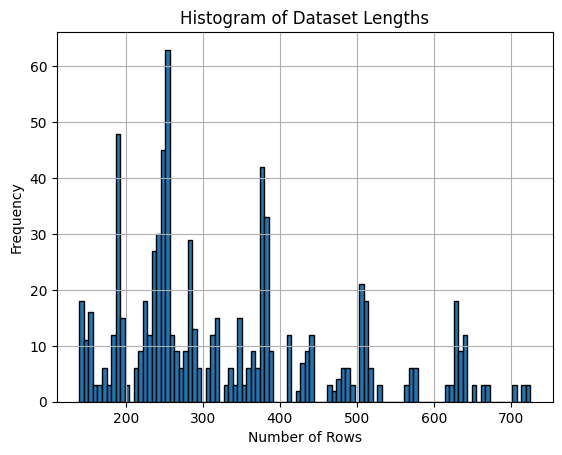

In [ ]:
# Define the directory containing the CSV files
root_dir = r"C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data"

# List to store dataset lengths
dataset_lengths = []

# Loop through each file in the directory
for filename in os.listdir(root_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(root_dir, filename)

        try:
            df = pd.read_csv(file_path)
            dataset_lengths.append(len(df))
        except Exception as e:
            print(f"Error reading {filename}: {e}")

# Show summary statistics
if dataset_lengths:
    print(f"Min rows:    {min(dataset_lengths)}")
    print(f"Max rows:    {max(dataset_lengths)}")
    print(f"Mean rows:   {round(sum(dataset_lengths) / len(dataset_lengths), 2)}")
    print(f"Median rows: {int(pd.Series(dataset_lengths).median())}")

    # Plot histogram
    plt.hist(dataset_lengths, bins=100, edgecolor='black')
    plt.xlabel("Number of Rows")
    plt.ylabel("Frequency")
    plt.title("Histogram of Dataset Lengths")
    plt.grid(True)
    plt.show()
else:
    print("No datasets found.")


Minimum NaN count: 0
Maximum NaN count: 843


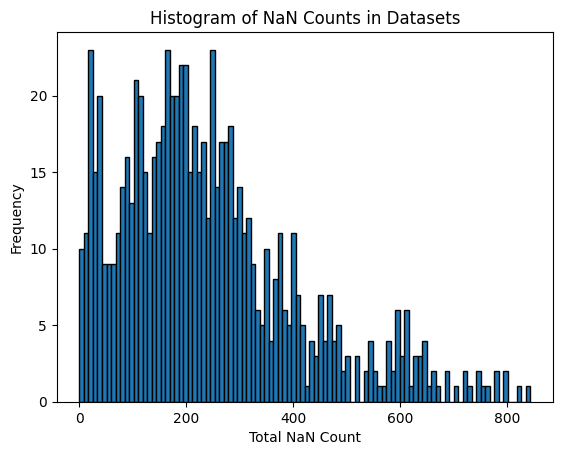

In [65]:
# Define the root directory
root_dir = r"C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\\processed_data\concat_data"

# List to store NaN counts
nan_counts = []

# Loop through each CSV file in the folder
for file in os.listdir(root_dir):
    if file.endswith(".csv"):  # Process only CSV files
        csv_path = os.path.join(root_dir, file)
        
        df = pd.read_csv(csv_path)
        
        # Count total NaN values in the entire DataFrame
        total_nans = df.isna().sum().sum()
        nan_counts.append(total_nans)

# Display statistics
if nan_counts:
    print("Minimum NaN count:", min(nan_counts))
    print("Maximum NaN count:", max(nan_counts))

    # Plot histogram
    plt.hist(nan_counts, bins=100, edgecolor='black')
    plt.xlabel("Total NaN Count")
    plt.ylabel("Frequency")
    plt.title("Histogram of NaN Counts in Datasets")
    plt.show()
else:
    print("No CSV files found.")

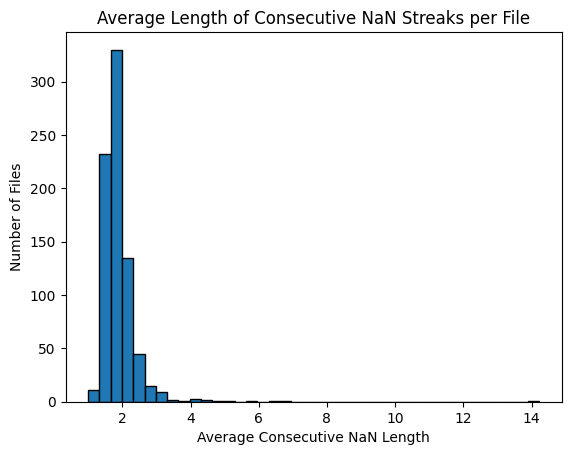

In [66]:
# Define the root directory
root_dir = r"C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data"

# List to store average consecutive NaN streak lengths per file
avg_consec_nan_lengths = []

# Loop through each CSV file in the folder
for file in os.listdir(root_dir):
    if file.endswith(".csv"):
        csv_path = os.path.join(root_dir, file)
        df = pd.read_csv(csv_path)

        # Flatten all NaN streaks across columns
        consec_nan_lengths = []

        for col in df.columns:
            is_nan = df[col].isna().astype(int)
            if is_nan.sum() == 0:
                continue  # No NaNs in this column, skip

            # Identify consecutive NaNs
            streak_length = 0
            for val in is_nan:
                if val == 1:
                    streak_length += 1
                elif streak_length > 0:
                    consec_nan_lengths.append(streak_length)
                    streak_length = 0
            # If the streak ends at the final row
            if streak_length > 0:
                consec_nan_lengths.append(streak_length)

        # Compute average streak length for this file
        if consec_nan_lengths:
            avg_length = np.mean(consec_nan_lengths)
            avg_consec_nan_lengths.append(avg_length)

# Plot the histogram
if avg_consec_nan_lengths:
    plt.hist(avg_consec_nan_lengths, bins=40, edgecolor='black')
    plt.title("Average Length of Consecutive NaN Streaks per File")
    plt.xlabel("Average Consecutive NaN Length")
    plt.ylabel("Number of Files")
    plt.show()
else:
    print("No NaN streaks found in any file.")

## Add flipped files

In [2]:
# Define the root directory
root_dir = r"C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data"

# Loop through all files in the directory
for filename in os.listdir(root_dir):
    if filename.endswith('.csv'):  # Only process .csv files
        # Construct the full path of the file
        file_path = os.path.join(root_dir, filename)

        # Load the CSV file
        df = pd.read_csv(file_path)

        # Reorder columns from A B C D E to D E C A B (index 0, 1, 2, 3, 4 -> 3, 4, 2, 0, 1)
        df = df.iloc[:, [3, 4, 2, 0, 1]]

        # Recalculate column C as the difference between column A and column D (iloc 0 - iloc 3)
        df.iloc[:, 2] = df.iloc[:, 0] - df.iloc[:, 3]

        # Construct the new filename by replacing the first character with '2'
        new_filename = '2' + filename[1:]

        # Save the modified file in the same directory with the new name
        new_file_path = os.path.join(root_dir, new_filename)
        df.to_csv(new_file_path, index=False)

        print(f"File saved as: {new_file_path}")

File saved as: C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data\212_117thstreetalternate_mckibbonaroachm.csv
File saved as: C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data\212_117thstreet_mckibbonaroachm.csv
File saved as: C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data\212_2300skidooalternate_mckibbonablakeya.csv
File saved as: C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data\212_2300skidoo_mckibbonablakeya.csv
File saved as: C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data\212_aarp_andersonjhirshfieldj.csv
File saved as: C:\Users\marc1\OneDrive\Desktop\School\Aarhus University\Current Classes\Thesis\Data\processed_data\concat_data\212_airoloblue_gertzejntshokom.csv
File sa